In [1]:
import os
import gc
import pandas as pd
from dateutil.relativedelta import relativedelta
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/data2/caozhehan/miniconda3/envs/trade/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# load files

In [2]:
train = pd.read_parquet("../input/amex-data-integer-dtypes-parquet-format/train_shifted.parquet")
test = pd.read_parquet("../input/amex-data-integer-dtypes-parquet-format/test_shifted.parquet")

# agg by S_2

In [3]:
test_public_end_year_month = test["end_year_month"].iloc[0]
test_private_end_year_month = test["end_year_month"].iloc[-1]

In [4]:
# shift for viz
test.loc[test["end_year_month"] == test_public_end_year_month, "S_2"] = \
    test.loc[test["end_year_month"] == test_public_end_year_month, "S_2"].map(lambda x: x + relativedelta(months=1))

test.loc[test["end_year_month"] == test_private_end_year_month, "S_2"] = \
    test.loc[test["end_year_month"] == test_private_end_year_month, "S_2"].map(lambda x: x + relativedelta(months=9))

In [5]:
end_of_train = pd.to_datetime(train["S_2"]).max()
end_of_public_test = pd.to_datetime(test.loc[test["end_year_month"] == test_public_end_year_month, "S_2"]).max()
end_of_private_test = pd.to_datetime(test.loc[test["end_year_month"] == test_private_end_year_month, "S_2"]).max()

In [6]:
train_agg = train.assign(S_2=lambda dx: pd.to_datetime(dx.S_2)).groupby("S_2").mean()
test_agg = test.assign(S_2=lambda dx: pd.to_datetime(dx.S_2)).groupby("S_2").mean()

agg_data = pd.concat([train_agg, test_agg])
agg_data = agg_data.drop(["customer_ID", "first_occurance", "time_id"], axis=1)

del train, test, train_agg, test_agg
gc.collect()

0

D_55


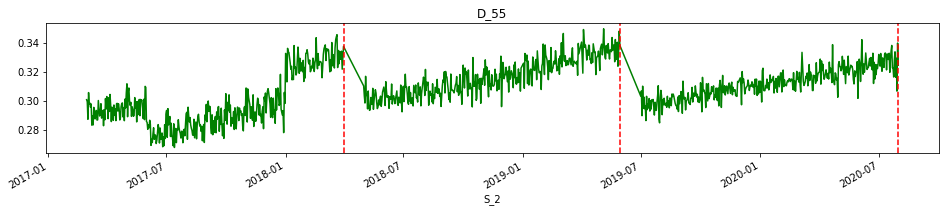

D_123


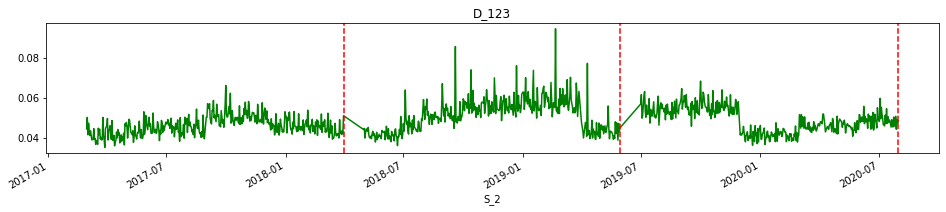

D_125


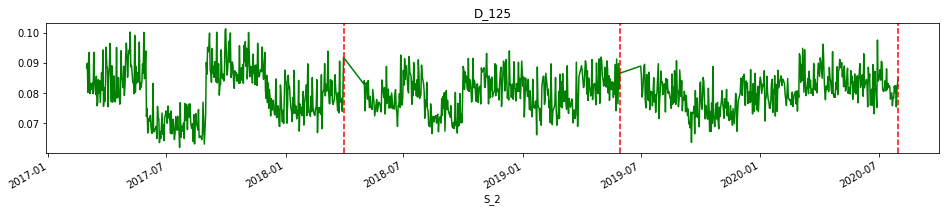

D_126


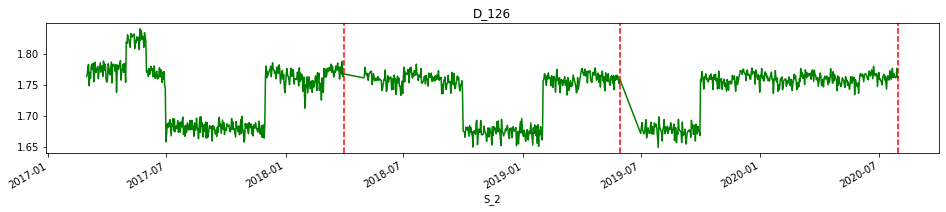

D_138


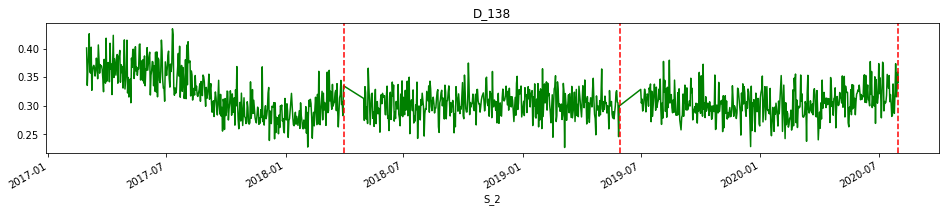

S_9


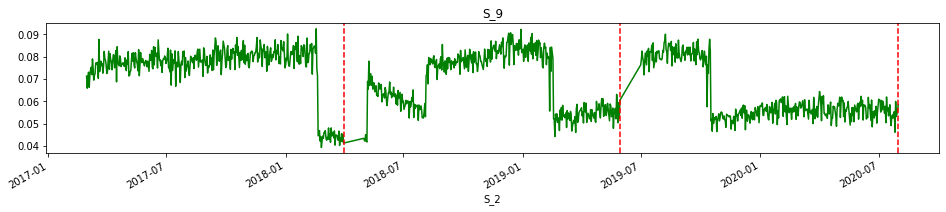

S_27


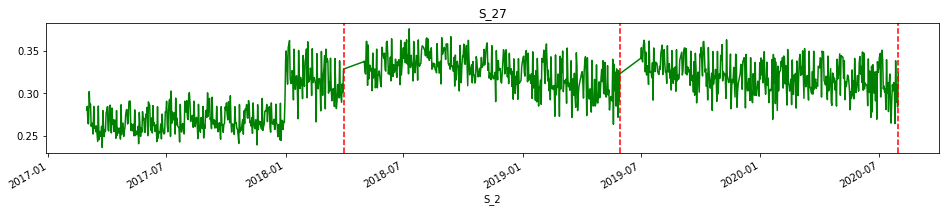

B_29


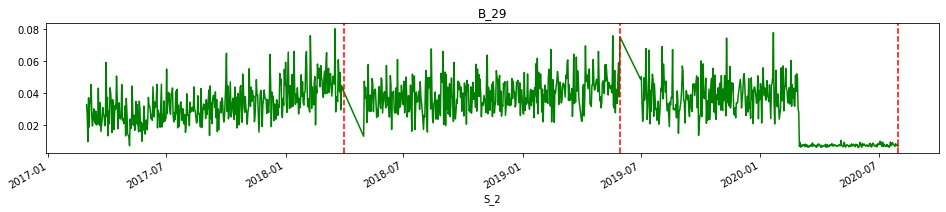

B_39


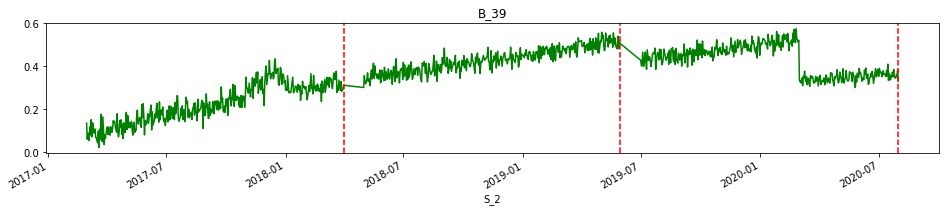

R_9


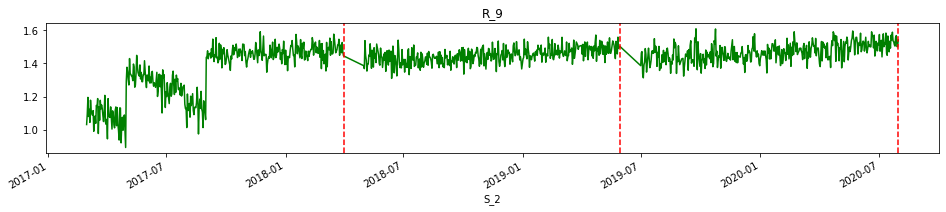

R_23


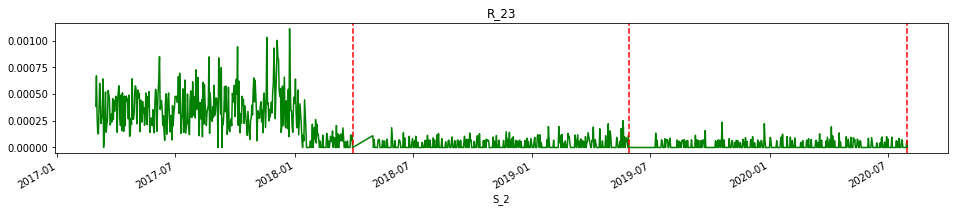

R_27


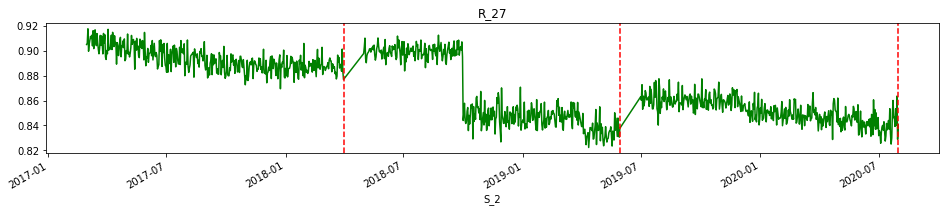

R_28


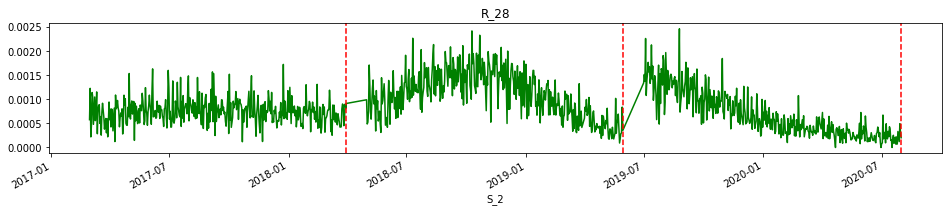

S_17


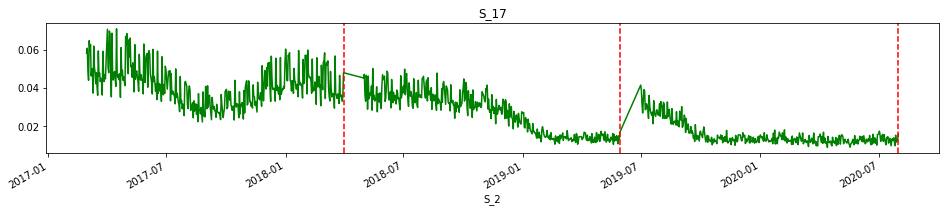

D_120


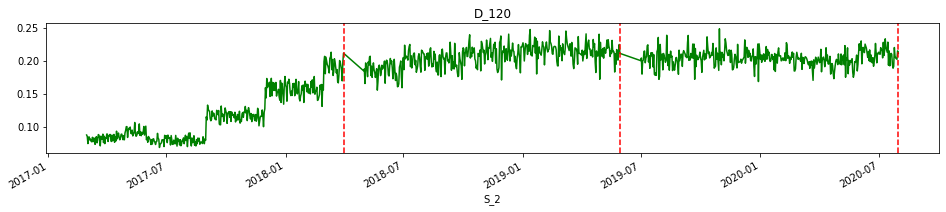

D_83


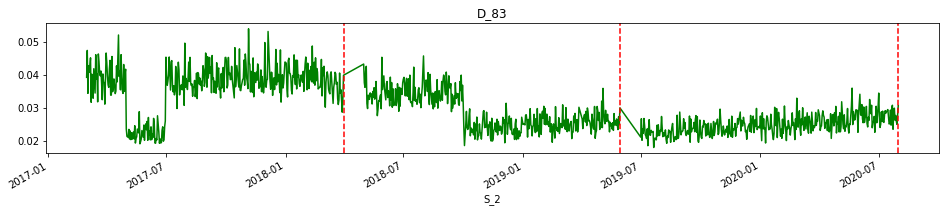

In [7]:
strange_features = [
    "D_55",
    "D_123",
    "D_125",
    "D_126",
    "D_138",
    "S_9",
    "S_27",
    "B_29",
    "B_39",
    "R_9",
    "R_23",
    "R_27",
    "R_28",
    "S_17",
    "D_120",
    "D_83",
]

for feature_name in strange_features:
    s = agg_data.loc[:, feature_name]

    print(feature_name)
    fig = plt.figure(figsize=(16, 6))
    mn = fig.add_subplot(2,2,(1,2)) 
    s.plot(color='green', ax=mn)
    mn.axvline(end_of_train, color='red', linestyle='--')
    mn.axvline(end_of_public_test, color='red', linestyle='--')
    mn.axvline(end_of_private_test, color='red', linestyle='--')
    mn.set_title(feature_name)
    plt.subplots_adjust(wspace= 0.25, hspace= 0.25)
    plt.show()

In [ ]:
shift_features = [
    "D_42",
    "D_52",
    "D_59",
    "D_79",
    "D_93",
    "D_105",
    "D_116",
    "D_122",
    "D_130",
    "D_133",
    "D_142",
    "S_11",
    "B_36"
]

for feature_name in shift_features:
    s = agg_data.loc[:, feature_name]

    print(feature_name)
    fig = plt.figure(figsize=(16, 6))
    mn = fig.add_subplot(2,2,(1,2)) 
    s.plot(color='green', ax=mn)
    mn.axvline(end_of_train, color='red', linestyle='--')
    mn.axvline(end_of_public_test, color='red', linestyle='--')
    mn.axvline(end_of_private_test, color='red', linestyle='--')
    mn.set_title(feature_name)
    plt.subplots_adjust(wspace= 0.25, hspace= 0.25)
    plt.show()

In [ ]:
outlier_features = [
    "D_69",
    "D_102",
    "D_106",
    "D_109",
    "D_144",
    "S_18",
    "S_23",
    "B_6",
    "B_10",
    "B_40"
]

for feature_name in outlier_features:
    s = agg_data.loc[:, feature_name]

    print(feature_name)
    fig = plt.figure(figsize=(16, 6))
    mn = fig.add_subplot(2,2,(1,2)) 
    s.plot(color='green', ax=mn)
    mn.axvline(end_of_train, color='red', linestyle='--')
    mn.axvline(end_of_public_test, color='red', linestyle='--')
    mn.axvline(end_of_private_test, color='red', linestyle='--')
    mn.set_title(feature_name)
    plt.subplots_adjust(wspace= 0.25, hspace= 0.25)
    plt.show()

In [ ]:
for first_letter in ["R"]:
    for feature_name in agg_data.columns:
        if feature_name[0] != first_letter:
            continue
        s = agg_data.loc[:, feature_name]
        
        print(feature_name)
        fig = plt.figure(figsize=(16, 6))
        mn = fig.add_subplot(2,2,(1,2)) 
        s.plot(color='green', ax=mn)
        mn.axvline(end_of_train, color='red', linestyle='--')
        mn.axvline(end_of_public_test, color='red', linestyle='--')
        mn.axvline(end_of_private_test, color='red', linestyle='--')
        mn.set_title(feature_name)
        plt.subplots_adjust(wspace= 0.25, hspace= 0.25)
        plt.show()

In [ ]:
strange_features = []

for first_letter in list(set([col.split('_')[0] for col in agg_data.columns])):
    for feature_name in agg_data.columns:
        if feature_name[0] != first_letter:
            continue
        s = agg_data.loc[:, feature_name]
        max_acf = np.abs(acf(s, nlags=agg_data.index.size - 1))[1:].max()
        if max_acf > 0.6:
            print(feature_name)
            strange_features.append(feature_name)
            fig = plt.figure(figsize=(16, 6))
            mn = fig.add_subplot(2,2,(1,2)) 
            s.plot(color='green', ax=mn)
            mn.axvline(end_of_train, color='red', linestyle='--')
            mn.axvline(end_of_public_test, color='red', linestyle='--')
            mn.axvline(end_of_private_test, color='red', linestyle='--')
            mn.set_title(feature_name)
            plt.subplots_adjust(wspace= 0.25, hspace= 0.25)
            plt.show()

# normalize then analyze

In [ ]:
train = pd.read_parquet("../input/amex-data-integer-dtypes-parquet-format/train_fillna.parquet")
test = pd.read_parquet("../input/amex-data-integer-dtypes-parquet-format/test_fillna.parquet")

In [ ]:
test_public_end_year_month = test["end_year_month"].iloc[0]
test_private_end_year_month = test["end_year_month"].iloc[-1]

In [ ]:
# shift for viz
test.loc[test["end_year_month"] == test_public_end_year_month, "S_2"] = \
    test.loc[test["end_year_month"] == test_public_end_year_month, "S_2"].map(lambda x: x + relativedelta(months=1))

test.loc[test["end_year_month"] == test_private_end_year_month, "S_2"] = \
    test.loc[test["end_year_month"] == test_private_end_year_month, "S_2"].map(lambda x: x + relativedelta(months=9))

In [ ]:
end_of_train = pd.to_datetime(train["S_2"]).max()
end_of_public_test = pd.to_datetime(test.loc[test["end_year_month"] == test_public_end_year_month, "S_2"]).max()
end_of_private_test = pd.to_datetime(test.loc[test["end_year_month"] == test_private_end_year_month, "S_2"]).max()

In [ ]:
# shift back
all_cols = [c for c in list(train.columns) if c not in ["customer_ID", "S_2", "first_occurance", "time_id", "end_year_month"]]
nan_related_features = [
    "number_of_observations",
    "type_0_nan",
    "type_1_nan",
    "type_2_nan"
]
cat_features = [
    "B_30",
    "B_38",
    "D_114",
    "D_116",
    "D_117",
    "D_120",
    "D_126",
    "D_63",
    "D_64",
    "D_66",
    "D_68"
]
num_features = [col for col in all_cols if col not in (cat_features + nan_related_features)]
shift_features = [feature for feature in num_features if feature in strange_features]
    
train[shift_features] -= train.groupby("customer_ID")[shift_features].transform("first")

test.loc[test["end_year_month"] == test_public_end_year_month, shift_features] -= \
    test.loc[test["end_year_month"] == test_public_end_year_month].groupby("customer_ID")[shift_features].transform("first")

test.loc[test["end_year_month"] == test_private_end_year_month, shift_features] -= \
    test.loc[test["end_year_month"] == test_private_end_year_month].groupby("customer_ID")[shift_features].transform("first")

In [ ]:
train_agg = train.assign(S_2=lambda dx: pd.to_datetime(dx.S_2)).groupby("S_2").mean()
test_agg = test.assign(S_2=lambda dx: pd.to_datetime(dx.S_2)).groupby("S_2").mean()

agg_data = pd.concat([train_agg, test_agg])
agg_data = agg_data.drop(["customer_ID", "first_occurance", "type_0_nan", "type_1_nan", "type_2_nan", "time_id"], axis=1)

del train, test, train_agg, test_agg
gc.collect()

In [ ]:
agg_data = agg_data[strange_features]

In [ ]:
strange_features = []

for first_letter in list(set([col.split('_')[0] for col in agg_data.columns])):
    for feature_name in agg_data.columns:
        if feature_name[0] != first_letter:
            continue
            
        s = agg_data.loc[:, feature_name]
        print(feature_name)
        strange_features.append(feature_name)
        fig = plt.figure(figsize=(16, 6))
        mn = fig.add_subplot(2,2,(1,2)) 
        s.plot(color='green', ax=mn)
        mn.axvline(end_of_train, color='red', linestyle='--')
        mn.axvline(end_of_public_test, color='red', linestyle='--')
        mn.axvline(end_of_private_test, color='red', linestyle='--')
        mn.set_title(feature_name)
        plt.subplots_adjust(wspace= 0.25, hspace= 0.25)
        plt.show()